In [6]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
import time
import seaborn as sns

import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from scipy.special import ellipj
from scipy.special import ellipkinc
from scipy.special import ellipk
from scipy.optimize import fsolve

In [19]:
M = 1 # massa do BURACO negro
b_c = 3*np.sqrt(3)*M # parametro de impacto CRITICO
theta_0 = 80*np.pi/180. #angulo de visada do buraco negro

In [3]:
def B_fun(p,M):
    return (p**3/(p-2*M))**0.5

In [4]:
def Q_fun(P,M):    
    return ((P - 2*M)*(P+6*M))**0.5


def gamma(alpha, theta_0):
    a = np.cos(alpha)**2 + 1/(np.tan(theta_0)**(2))
    return np.arccos( np.cos(alpha)/(a**0.5)  )


def k2(P,M):
   
    Q = Q_fun(P,M)
    return ((Q-P+6*M)/(2*Q))

def zeta_inf(P,M):
    Q = Q_fun(P,M)
    ratio = (Q-P+2*M)/(Q-P +6*M)
    return np.arcsin( ratio**0.5 )

### 1st order
def Up(P,alpha,M,theta_0): #u = 1/r
    # b = np.sqrt(X**2 + Y**2)
    # alpha = np.arctan(Y/X)
    Q = Q_fun(P)
    A1 = (Q-P+2*M)/(4*M*P)
    A2 = (Q-P+6*M)/(4*M*P)
    g = gamma(alpha,theta_0)
    ratio = (Q/P)**0.5
    mod = k2(P,M)
    sn, cn, dn, ph = ellipj( ((g/2)*ratio + ellipkinc(zeta_inf(P) , mod)), mod )
    
    return -A1 + A2*sn**2 #tenho de procurar jacobi porra

### 2nd order
def Up2(P,alpha,M,theta_0): #u = 1/r
    # b = np.sqrt(X**2 + Y**2)
    # alpha = np.arctan(Y/X)
    Q = Q_fun(P)
    A1 = (Q-P+2*M)/(4*M*P)
    A2 = (Q-P+6*M)/(4*M*P)
    g = gamma(alpha,theta_0)
    ratio = (Q/P)**0.5
    mod = k2(P,M)
    sn, cn, dn, ph = ellipj( (0.5*(g-2*np.pi)*ratio + 2*ellipk(mod) - ellipkinc(zeta_inf(P) , mod)), mod )
    
    return -A1 + A2*sn**2 #tenho de procurar jacobi porra

52it [01:15,  1.45s/it]


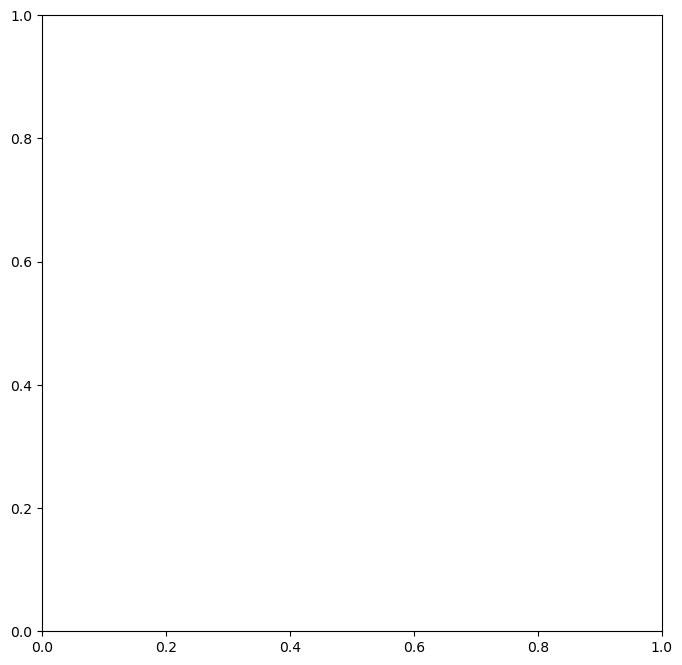

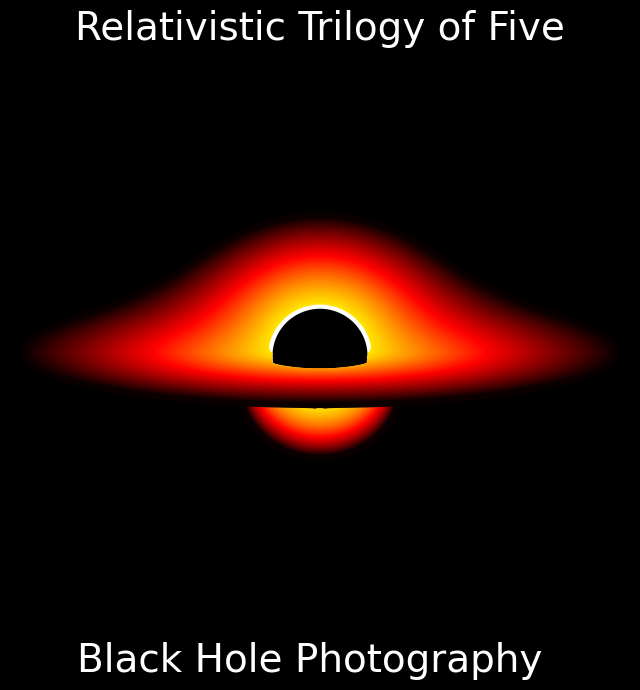

In [24]:
fig, ax = plt.subplots(figsize = (8,8))
r_list = np.arange(4,30,0.5)*M
# r_list = [6,10,20,30]*M

color=iter(plt.cm.hot_r(np.linspace(0.3 ,1.,  np.shape(r_list)[0])))

for idx, r in tqdm(enumerate(r_list)):

    #colors
    c=next(color)

    alpha_list = np.arange(0, 2*np.pi,0.01)
    b_list = []
    b_list2 = []
    alpha_res = []
    alpha_res2 = []
    #plt.figure(figsize = (15,15), dpi = 300)
    for alpha in alpha_list:    
        # 1st order figure
        def cu(P):
            return 1 - r*Up(P,alpha)
        
        # 2nd order figure
        def cu2(P):
            return -(1 - r*Up2(P,alpha))
        
        
        guess = b_c + 0.1
        # raiz = fsolve(cu,[guess])[0]
        raiz = fsolve(cu,[guess])[0]
        raiz2 = fsolve(cu2,[guess])[0]
        
        # 1st order
        if raiz != guess:
        
            b_raiz = B_fun(raiz)
            b_list.append(b_raiz)
            alpha_res.append(alpha)
            
        # 2nd order
        if raiz2 != guess:
        
            b_raiz2 = B_fun(raiz2)
            b_list2.append(b_raiz2)
            alpha_res2.append(alpha)
    
    
    # 1st order:
    x = b_list*np.cos(alpha_res)
    y = b_list*np.sin(alpha_res)
    
    if idx > 3:
        x_interp = np.concatenate((y[-20:-10], y[10:20]))
        y_interp = np.concatenate((-x[-20:-10], -x[10:20]))
        f = interp1d(x_interp, y_interp, kind = 'quadratic')

        x_new = np.linspace(y[-10], y[10], 100)
        plt.plot(x_new, f(x_new), color = c,
                    zorder = 1, lw = 4)
        
    #2nd order:
    x2 = b_list2*np.cos(alpha_res2)
    y2 = b_list2*np.sin(alpha_res2)
    
    ## Limits
    xlims = [-32,32]
    ylims = [-32,32]
    
    xplot = []
    yplot = []
        
    for xp in x2:
        if xlims[0] < xp < xlims[1]:
            xplot.append(xp)
            
    for yp in y2:
        if ylims[0] < yp < ylims[1]:
            yplot.append(yp)
    
## Remove points
    if abs(np.shape(xplot)[0] - np.shape(yplot)[0]) != 0:
        
        xshape = np.shape(xplot)[0] 
        yshape = np.shape(yplot)[0]
        
        if xshape < yshape:
            dif = abs(np.shape(xplot)[0] - np.shape(yplot)[0]) 

            yplot2 = yplot[dif:]
            xplot2 = xplot

        if yshape < xshape:
            dif = abs(np.shape(xplot)[0] - np.shape(yplot)[0]) 

            xplot2 = xplot[dif:]
            yplot2 = yplot 
            
          
    plt.plot(y,-x,color = c,zorder = 2, lw = 4)
    plt.plot(yplot2,xplot2,color = c, zorder = 1, lw = 4)

# x_ovo = 3*M*np.cos(alpha_list)
# y_ovo = 3*M*np.sin(alpha_list)

# plt.plot(x_ovo,y_ovo)    
circle = plt.Circle((0., 0.), 2*M, color='black', fill=True, zorder=0)
plt.gca().add_patch(circle)
circle = plt.Circle((0., 0.), 3*M, color='black', fill=True, zorder=0, alpha = 0.3)
plt.gca().add_patch(circle)
circle = plt.Circle((0., 0.), np.sqrt(3)*3*M, facecolor = 'none', edgecolor='white', fill=True,
                    zorder=0, lw = 4)
plt.gca().add_patch(circle)

plt.xlim(-32,32)
plt.ylim(-32,32)
plt.axis('off')
fig.patch.set_color('black')
for ax in fig.axes:
    ax.patch.set_color('black')
plt.title(f'Relativistic Trilogy of Five', fontsize = 28,
         color = 'white')
fig.text(0.5, 0.1, f'Black Hole Photography', fontsize = 28,
         color = 'white', ha = 'center')
plt.savefig(f'Isoradical_theta_logo.png',
            dpi = 300, bbox_inches = 'tight')
plt.savefig(f'Isoradical_theta_logo.svg',
            dpi = 300, bbox_inches = 'tight')
plt.show()

In [ ]:
for angle in tqdm([int(5*i) for i in range(17,19)]):
    M = 1 # massa do BURACO negro
    b_c = 3*np.sqrt(3)*M # parametro de impacto CRITICO
    theta_0 = angle*np.pi/180. #angulo de visada do buraco negro

    fig, ax = plt.subplots(figsize = (8,8))
    #r_list = [30*M,20*M,10*M,6*M]
    r_list = np.arange(4,30,0.5)*M
    
    color=iter(plt.cm.hot_r(np.linspace(0.3 ,1.,  np.shape(r_list)[0])))

    for idx, r in enumerate(r_list):
        if angle > 82:
            alpha_list = np.arange(0, 4*np.pi,0.01)
        else:
            alpha_list = np.arange(0, 2*np.pi,0.01)
        
        c=next(color)
        b_list = []
        b_list2 = []
        alpha_res = []
        alpha_res2 = []
        #plt.figure(figsize = (15,15), dpi = 300)
        for alpha in alpha_list:    
            # 1st order figure
            def cu(P):
                return 1 - r*Up(P,alpha)

            # 2nd order figure
            def cu2(P):
                return -(1 - r*Up2(P,alpha))


            guess = b_c + 0.1
            # raiz = fsolve(cu,[guess])[0]
            raiz = fsolve(cu,[guess])[0]
            raiz2 = fsolve(cu2,[guess])[0]

            # 1st order
            if raiz != guess:

                b_raiz = B_fun(raiz)
                b_list.append(b_raiz)
                alpha_res.append(alpha)

            # 2nd order
            if raiz2 != guess:

                b_raiz2 = B_fun(raiz2)
                b_list2.append(b_raiz2)
                alpha_res2.append(alpha)


        # 1st order:
        x = b_list*np.cos(alpha_res)
        y = b_list*np.sin(alpha_res)
        if angle < 82:
            if idx > 3:
                x_interp = np.concatenate((y[-20:-10], y[10:20]))
                y_interp = np.concatenate((-x[-20:-10], -x[10:20]))
                f = interp1d(x_interp, y_interp, kind = 'quadratic')

                x_new = np.linspace(y[-10], y[10], 100)
                plt.plot(x_new, f(x_new), color = c,
                            zorder = 1, lw = 4)

        #2nd order:
        x2 = b_list2*np.cos(alpha_res2)
        y2 = b_list2*np.sin(alpha_res2)

        ## Limits
        xlims = [-32,32]
        ylims = [-32,32]

        xplot = []
        yplot = []

        for xp in x2:
            if xlims[0] < xp < xlims[1]:
                xplot.append(xp)

        for yp in y2:
            if ylims[0] < yp < ylims[1]:
                yplot.append(yp)

    ## Remove points
        if abs(np.shape(xplot)[0] - np.shape(yplot)[0]) != 0:

            xshape = np.shape(xplot)[0] 
            yshape = np.shape(yplot)[0]

            if xshape < yshape:
                dif = abs(np.shape(xplot)[0] - np.shape(yplot)[0]) 

                yplot2 = yplot[dif:]
                xplot2 = xplot

            if yshape < xshape:
                dif = abs(np.shape(xplot)[0] - np.shape(yplot)[0]) 

                xplot2 = xplot[dif:]
                yplot2 = yplot 


        plt.plot(y,-x,color = c,zorder = 2, lw = 4)
        plt.plot(yplot2,xplot2,color = c, zorder = 1, lw = 4)

    # x_ovo = 3*M*np.cos(alpha_list)
    # y_ovo = 3*M*np.sin(alpha_list)

    # plt.plot(x_ovo,y_ovo)    
    circle = plt.Circle((0., 0.), 2*M, color='black', fill=True, zorder=0)
    plt.gca().add_patch(circle)
    circle = plt.Circle((0., 0.), 3*M, color='black', fill=True, zorder=0, alpha = 0.3)
    plt.gca().add_patch(circle)
    circle = plt.Circle((0., 0.), np.sqrt(3)*3*M, facecolor = 'none', edgecolor='white', fill=True,
                        zorder=0, lw = 4)
    plt.gca().add_patch(circle)

    plt.xlim(-32,32)
    plt.ylim(-32,32)
    plt.axis('off')
    fig.patch.set_color('black')
    for ax in fig.axes:
        ax.patch.set_color('black')
    plt.title(f'Black hole accretion disk view - {int(theta_0*180/np.pi)}$^\circ$', fontsize = 20,
             color = 'white')
    plt.savefig(f'Isoradical_theta_{int(theta_0*180/np.pi)}_mass_{int(M)}.png',
                dpi = 300, bbox_inches = 'tight')
    plt.savefig(f'Isoradical_theta_{int(theta_0*180/np.pi)}_mass_{int(M)}.svg',
                dpi = 300, bbox_inches = 'tight')
    plt.close()

 50%|█████     | 1/2 [02:33<02:33, 153.73s/it]